In [1]:
#%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [3]:
city_data_df = pd.read_csv("./Resources/city_data.csv")
ride_data_df = pd.read_csv("./Resources/ride_data.csv")
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5.739410e+12
1,South Michelleport,04/03/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,24/02/2019 04:29,33.44,2.005070e+12
3,Rodneyfort,10/02/2019 23:22,23.44,5.149250e+12
4,South Jack,06/03/2019 04:28,34.58,3.908450e+12
5,South Latoya,11/03/2019 12:26,9.52,1.995000e+12
6,New Paulville,27/02/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,26/04/2019 00:43,35.98,1.119540e+11
8,South Karenland,08/01/2019 03:28,35.09,7.995620e+12
9,North Jasmine,09/03/2019 06:26,42.81,5.327640e+12


In [5]:
# Inspecting the data 

city_data_df.info()
# city_data_df.count()
# city_data_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [6]:
# Unique values of type of city 
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
urban = sum(city_data_df["type"] == "Urban")
urban

66

In [8]:
rural = sum(city_data_df["type"] == "Rural")
rural

18

In [9]:
suburban = sum(city_data_df["type"] == "Suburban")
suburban

36

In [10]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   float64
dtypes: float64(2), object(2)
memory usage: 74.3+ KB


In [12]:
# Merging the DataFrames 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3.908450e+12,46,Urban


In [13]:
# Bubble plot 
    # Separating Data Frames to get the data of each type of city
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]


In [14]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_drivers = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

In [15]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]

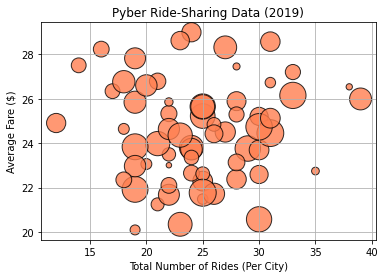

In [16]:
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_avg_drivers, c="coral", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend
plt.show()

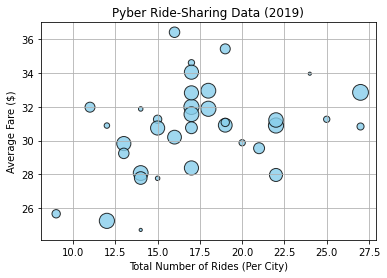

In [17]:
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_avg_drivers, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Subrban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend
plt.show()

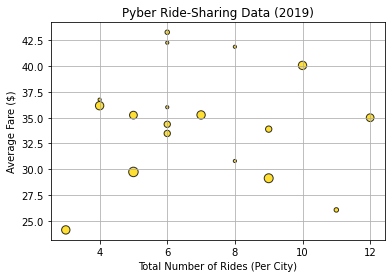

In [18]:
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_avg_drivers, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend
plt.show()

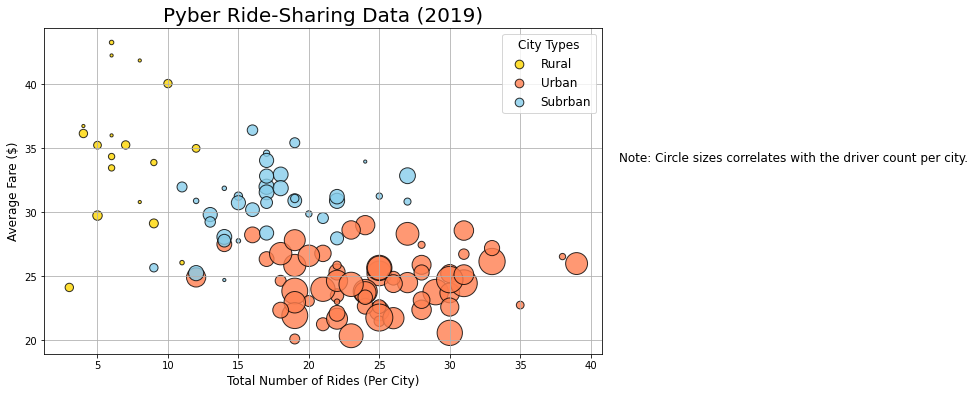

In [19]:
plt.subplots(figsize=(10, 6))

plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_avg_drivers, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")

plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_avg_drivers, c="coral", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_avg_drivers, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Subrban")


plt.title("Pyber Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)
lgnd = plt.legend(fontsize = 12, mode = "Expanded",
                  scatterpoints = 1, loc = "best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,34, "Note: Circle sizes correlates with the driver count per city.", fontsize=12)
plt.show()

In [20]:
# Save the figure 
plt.savefig("./Analysis/Fig1.png")

<Figure size 432x288 with 0 Axes>

In [21]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [22]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [23]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [24]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [25]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [26]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [27]:
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [28]:
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [29]:
round(urban_ride_count.mode(), 2), round(suburban_ride_count.mode(), 2), round(rural_ride_count.mode(), 2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [30]:
# Calculate the measures of central tendency for the ride count for the urban cities.
# mean_urban_ride_count = np.mean(urban_ride_count)
# print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

# median_urban_ride_count = np.median(urban_ride_count)
# print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [31]:
urban_fares = urban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [32]:
suburban_fares = suburban_cities_df["fare"]

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [33]:
rural_fares = rural_cities_df["fare"]

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [34]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean of drivers for urban cities is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median of drivers for urban cities is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode of drivers for urban cities is ${mode_urban_drivers}.")

The mean of drivers for urban cities is $36.68.
The median of drivers for urban cities is $37.00.
The mode of drivers for urban cities is $ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [35]:
suburban_drivers = suburban_cities_df['driver_count']
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean of drivers for suburban cities is ${mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median of drivers for suburban cities is ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode of drivers for suburban cities is ${mode_suburban_drivers}.")

The mean of drivers for suburban cities is $13.71.
The median of drivers for suburban cities is $16.00.
The mode of drivers for suburban cities is $ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [36]:
rural_drivers = rural_cities_df["driver_count"]

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean of drivers for rural cities is ${mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median of drivers for rural cities is ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode of drivers for rural cities is {mode_rural_drivers}.")

The mean of drivers for rural cities is $4.30.
The median of drivers for rural cities is $4.00.
The mode of drivers for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


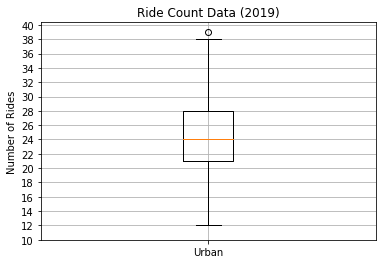

In [37]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

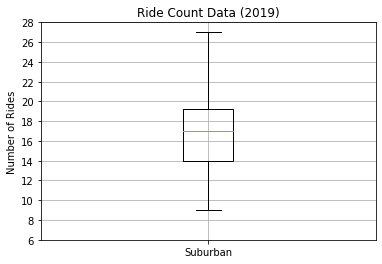

In [38]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(6, 29, step=2.0))
ax.grid()
plt.show()

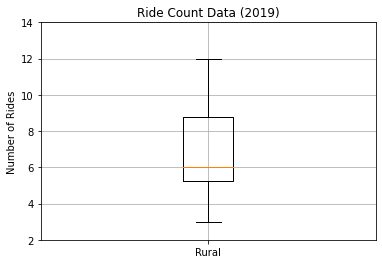

In [39]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2, 16, step=2.0))
ax.grid()
plt.show()

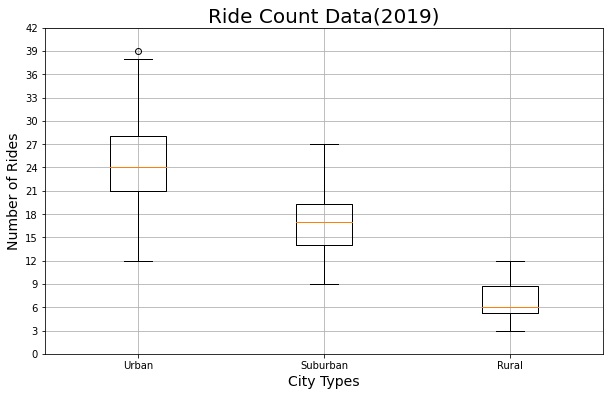

In [40]:
xlabels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title("Ride Count Data(2019)", fontsize = 20)
ax.set_ylabel("Number of Rides", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.boxplot(ride_count_data, labels = xlabels)
ax.set_yticks(np.arange(0, 45, step = 3.0))
ax.grid()
plt.savefig("./Analysis/Fig2.png")
plt.show()

In [41]:
# Get the city that matches 39 rides 
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} is the city that with the highest ride count (39)")

West Angela is the city that with the highest ride count (39)


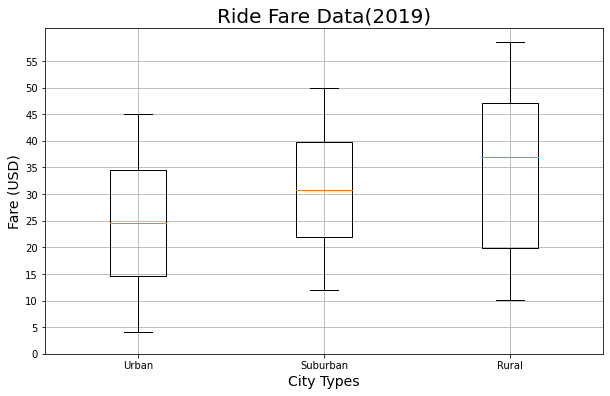

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [42]:
xlabels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title("Ride Fare Data(2019)", fontsize = 20)
ax.set_ylabel("Fare (USD)", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.boxplot(ride_fare_data, labels = xlabels)
ax.set_yticks(np.arange(0, 60,step = 5))
ax.grid()
plt.savefig("./Analysis/Fig3.png")
plt.show()
urban_fares.describe()

In [43]:
suburban_fares.describe()

count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [44]:
rural_fares.describe()

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

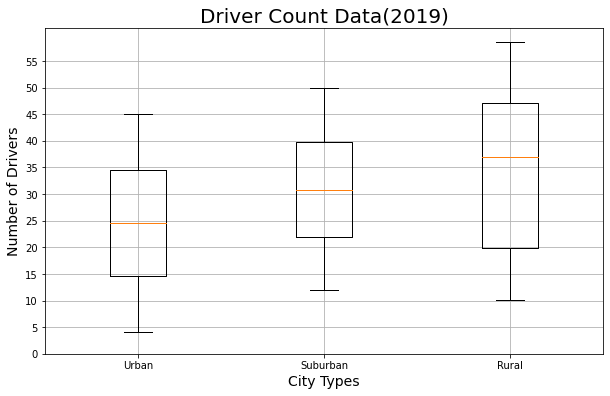

In [45]:
xlabels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title("Driver Count Data(2019)", fontsize = 20)
ax.set_ylabel("Number of Drivers", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.boxplot(driver_count_data, labels = xlabels)
ax.set_yticks(np.arange(0, 60,step = 5))
ax.grid()
plt.savefig("./Analysis/Fig4.png")
plt.show()



# Pie Chart

In [46]:
# Sum of fares for each type of city
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [47]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [48]:
type_percents = 100 * sum_fares_by_type/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

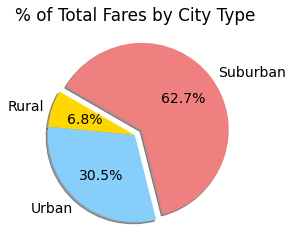

In [50]:
# Pie Chart 
plt.pie(type_percents, 
        labels=["Rural", "Urban", "Suburban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0, 0, 0.1],
        autopct = "%1.1f%%",
        shadow = True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams["font.size"] = 14
plt.savefig("./Analysis/fig5.png")
plt.show()

In [65]:
# Pie Chart of Ride Percentages 
sum_rides_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [66]:
total_rides = pyber_data_df.count()["ride_id"]
total_rides

2375

In [77]:
ride_percents = 100 * sum_rides_type/total_rides
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

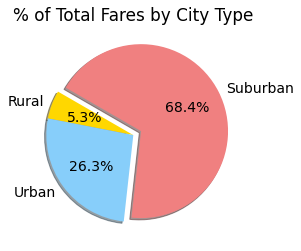

In [78]:
# Pie Chart 
plt.pie(ride_percents, 
        labels=["Rural", "Urban", "Suburban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0, 0, 0.1],
        autopct = "%1.1f%%",
        shadow = True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams["font.size"] = 14
plt.savefig("./Analysis/fig6.png")
plt.show()

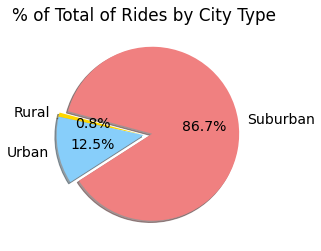

In [82]:
# Pie Chart for percentage for total driver for city type 
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
plt.pie(driver_percents, 
        labels=["Rural", "Urban", "Suburban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0, 0, 0.1],
        autopct = "%1.1f%%",
        shadow = True, startangle=165)
plt.title("% of Total of Rides by City Type")
mpl.rcParams["font.size"] = 14
plt.savefig("./Analysis/fig7.png")
plt.show()